<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Name>
    <Class>
    <Date>

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import wavfile
import IPython
from scipy.fftpack import fft

In [2]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [3]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self, dft = False, audible = False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        if(dft):
            plt.subplot(211)
        seconds = len(self.samples)/self.rate
        domain = np.linspace(0, seconds, len(self.samples))
        plt.plot(domain, self.samples)
        if(dft):
            plt.subplot(212)
            freqs = fft(self.samples)/seconds
            if audible:
                plt.plot(np.abs(freqs[:20000]))
            else:
                plt.plot(np.abs(freqs[:len(freqs)//2]))


    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        if force:
            samples = np.int16(self.samples/np.max(np.abs(self.samples)) * 32767)
        elif self.samples.dtype != np.int16:
            samples = np.int16(self.samples/np.max(np.abs(self.samples)) * 32767)
        else: samples = self.samples
        
        wavfile.write(filename, self.rate, samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        if(len(self.samples) != len(other.samples)):
            raise ValueError("Sample arrays are not of same length")
        return SoundWave(self.rate, self.samples + other.samples)


    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if(self.rate != other.rate):
            raise ValueError("Sample rates are not the same")
        return SoundWave(self.rate, np.append(self.samples, other.samples))

    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

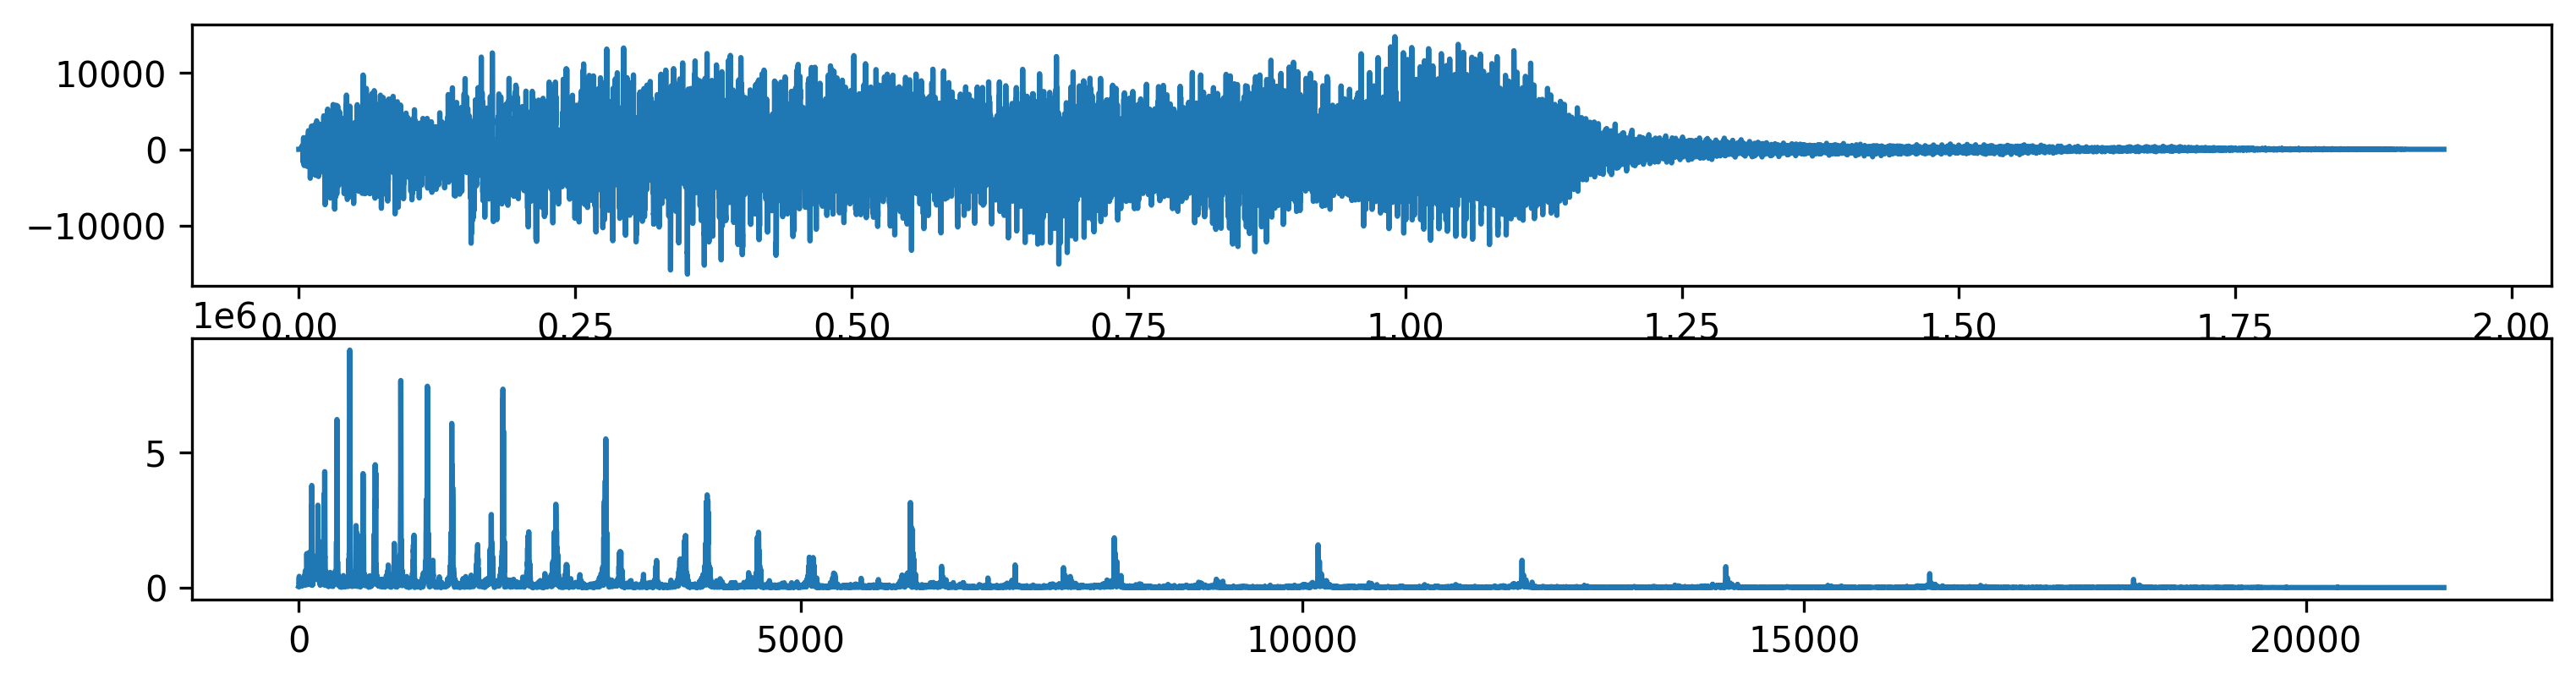

In [4]:
rate, samples = wavfile.read("tada.wav")
soundbyte = SoundWave(rate, samples)
soundbyte.plot(True)

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [5]:
soundbyte.export("tada_new.wav")
soundbyte.export("tada_forced.wav", force = True)

In [6]:
IPython.display.Audio(filename = "tada.wav")

In [7]:
IPython.display.Audio(filename = "tada_new.wav")

In [8]:
IPython.display.Audio(filename = "tada_forced.wav")

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [9]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    RATE = 44100
    num_samples = duration * RATE
    domain = np.linspace(0,duration, num_samples)
    rng = np.sin(2*np.pi * frequency * domain)
    return SoundWave(RATE, rng)

In [10]:
A = generate_note(440, 2)

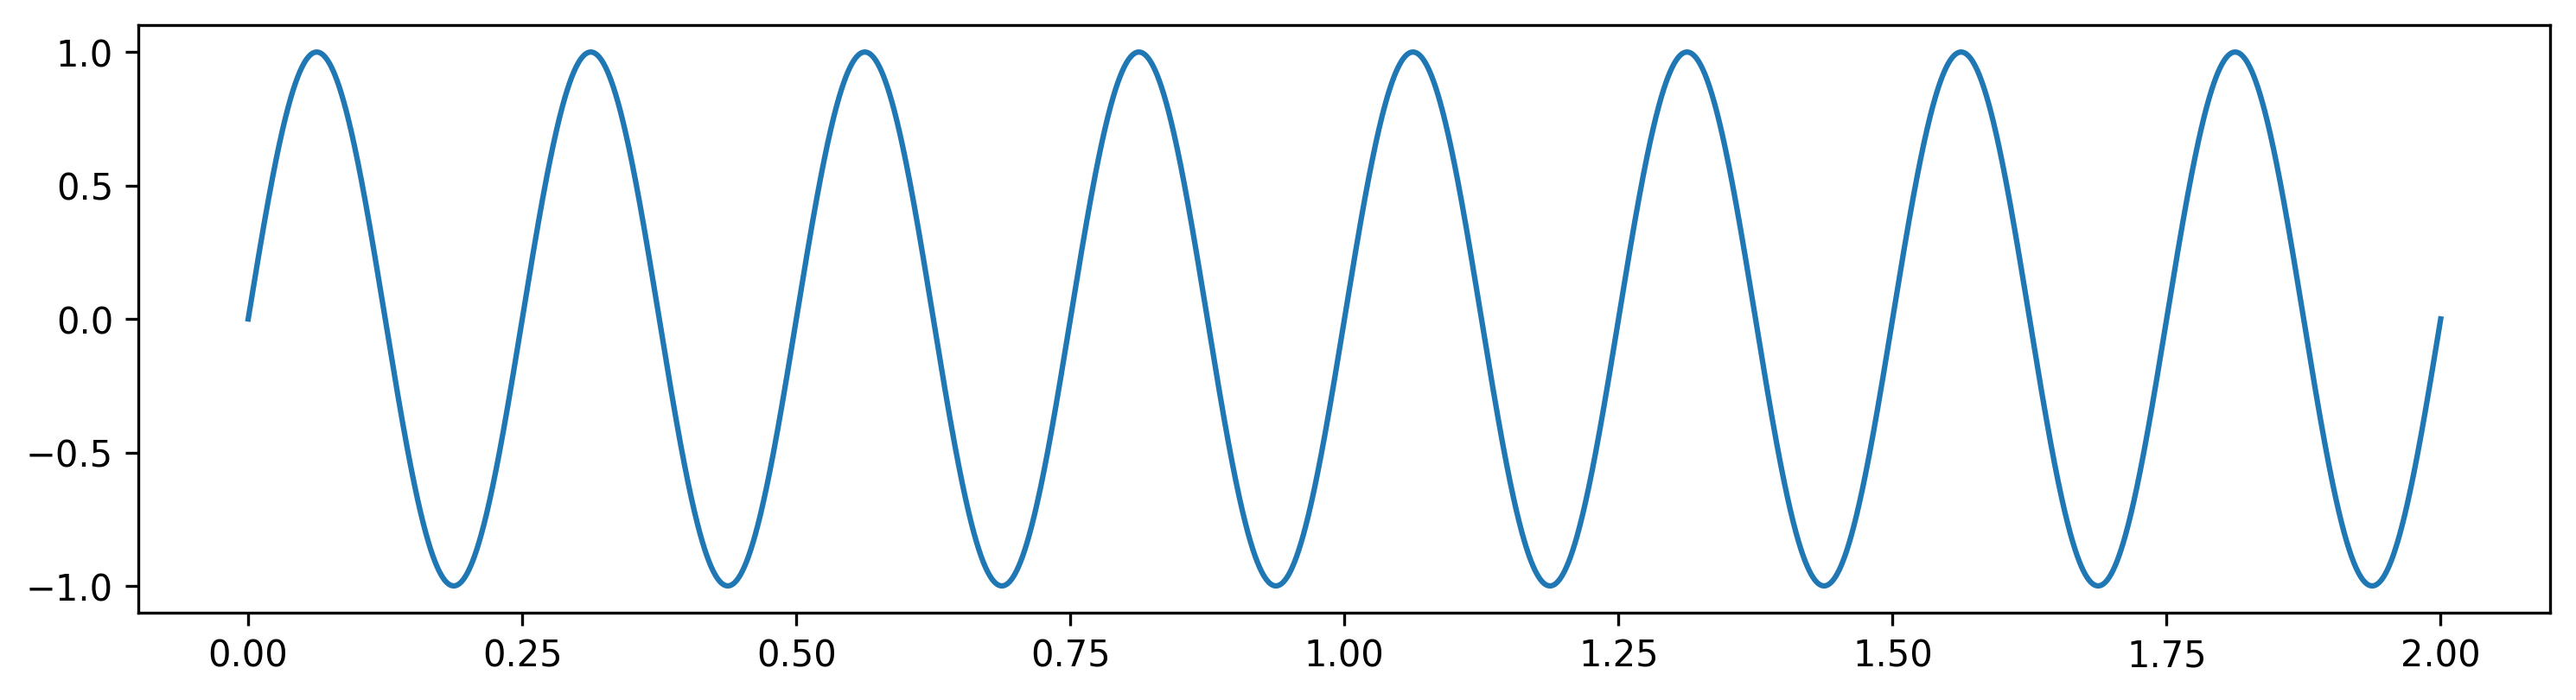

In [11]:
really_low_note = generate_note(4,2)
really_low_note.plot()

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [12]:
A = generate_note(440, 3)
C = generate_note(523.25, 3)
E = generate_note(659.25, 3)
chord = A+C+E
wavfile.write("minor_chord.wav", 44100, chord.samples)

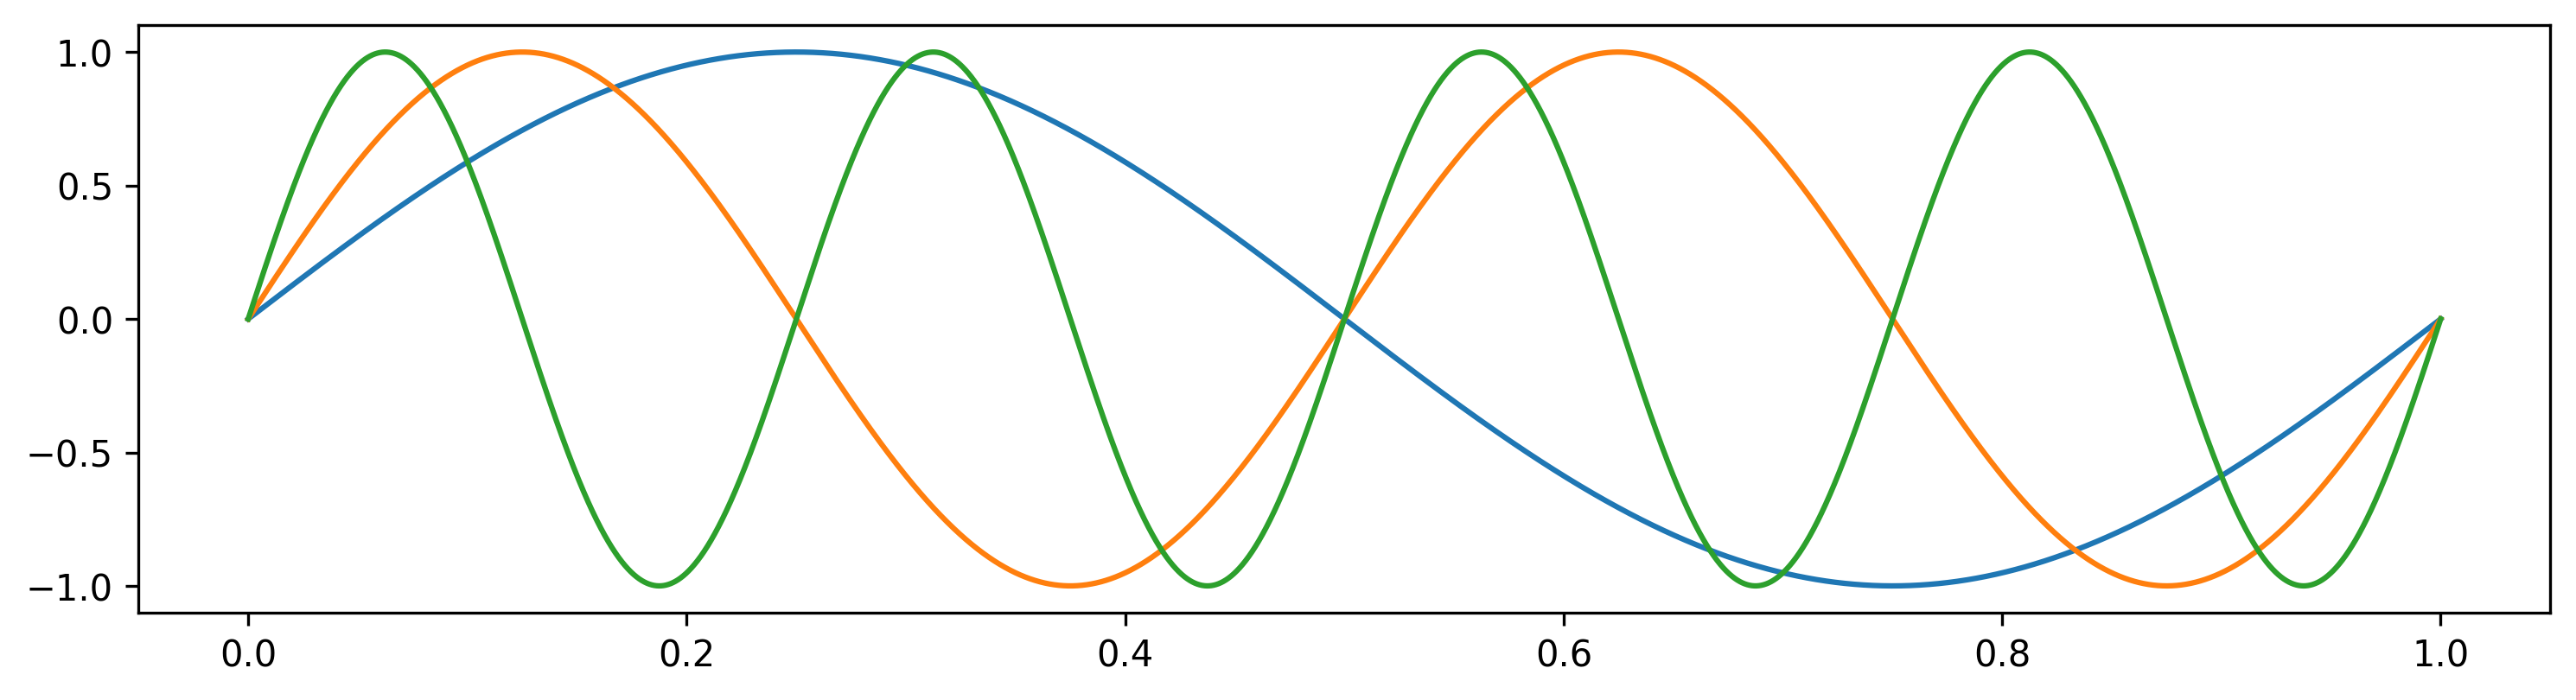

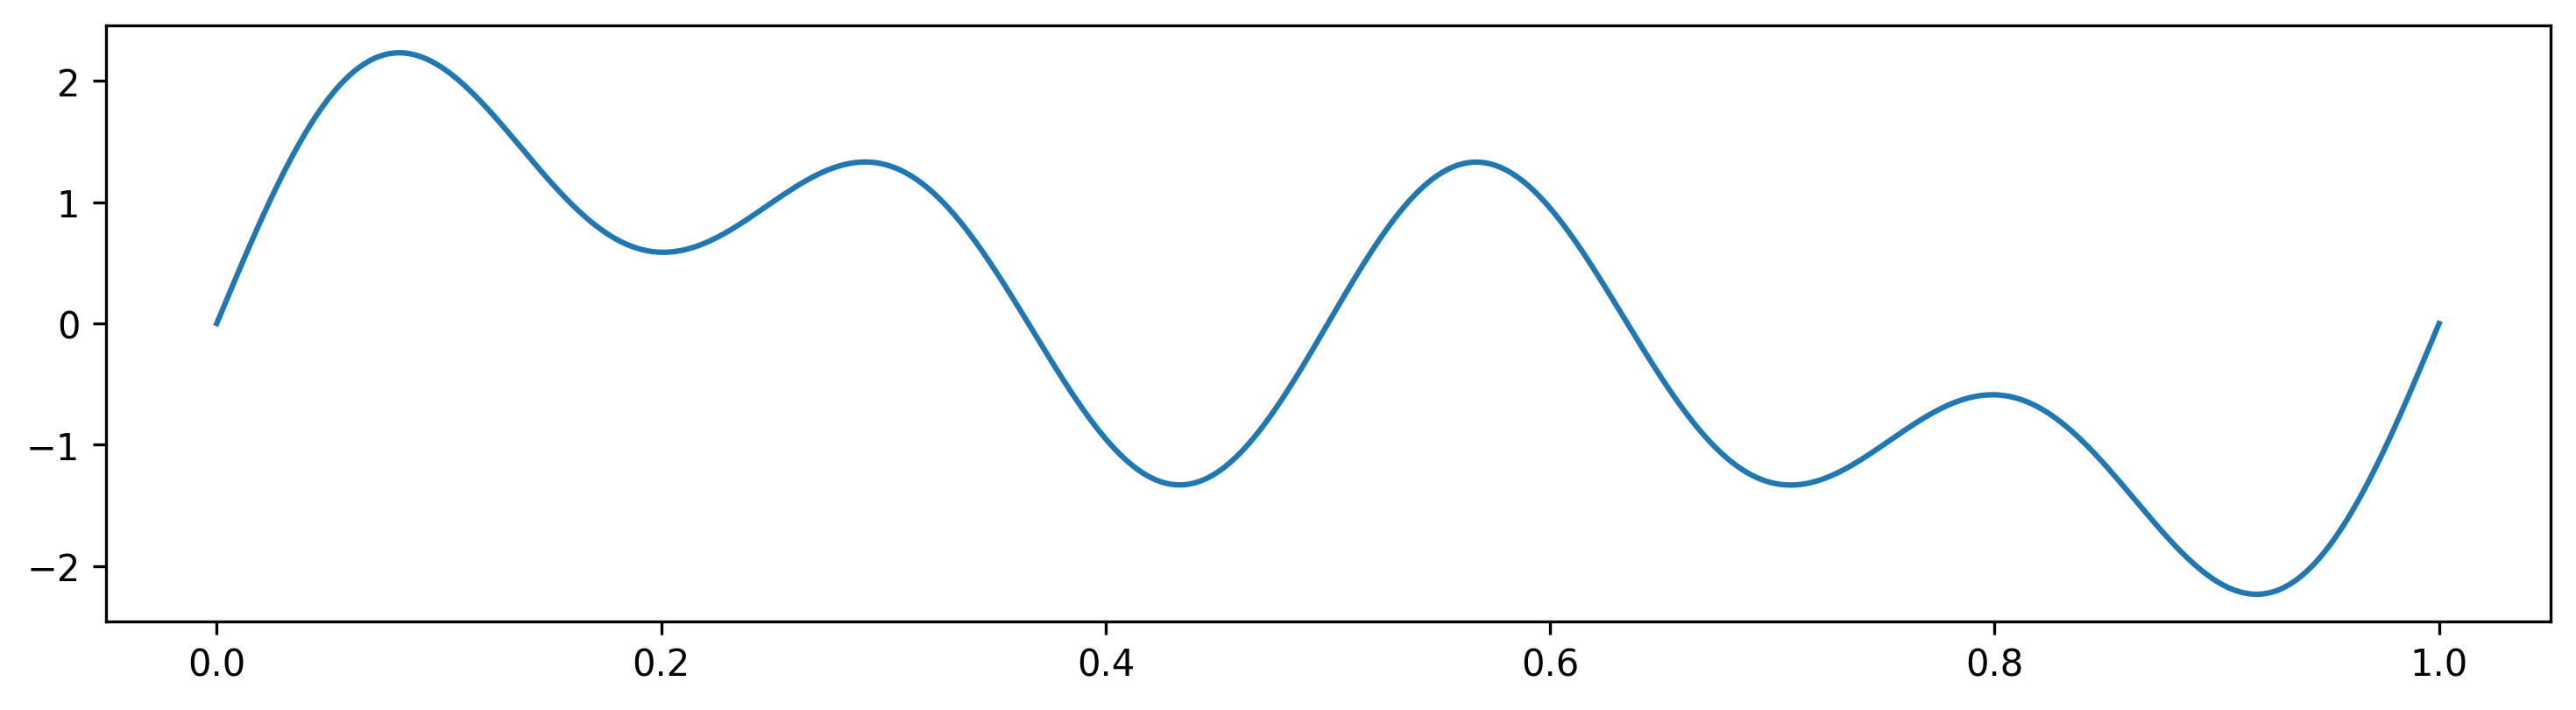

In [13]:
one = generate_note(1, 1)
two = generate_note(2,1)
three = generate_note(4,1)
low_chord = one+two+three
one.plot()
two.plot()
three.plot()
plt.show()
low_chord.plot()

In [14]:
arpeggio = A >> C >> E

wavfile.write("arpeggio.wav", 44100, arpeggio.samples)

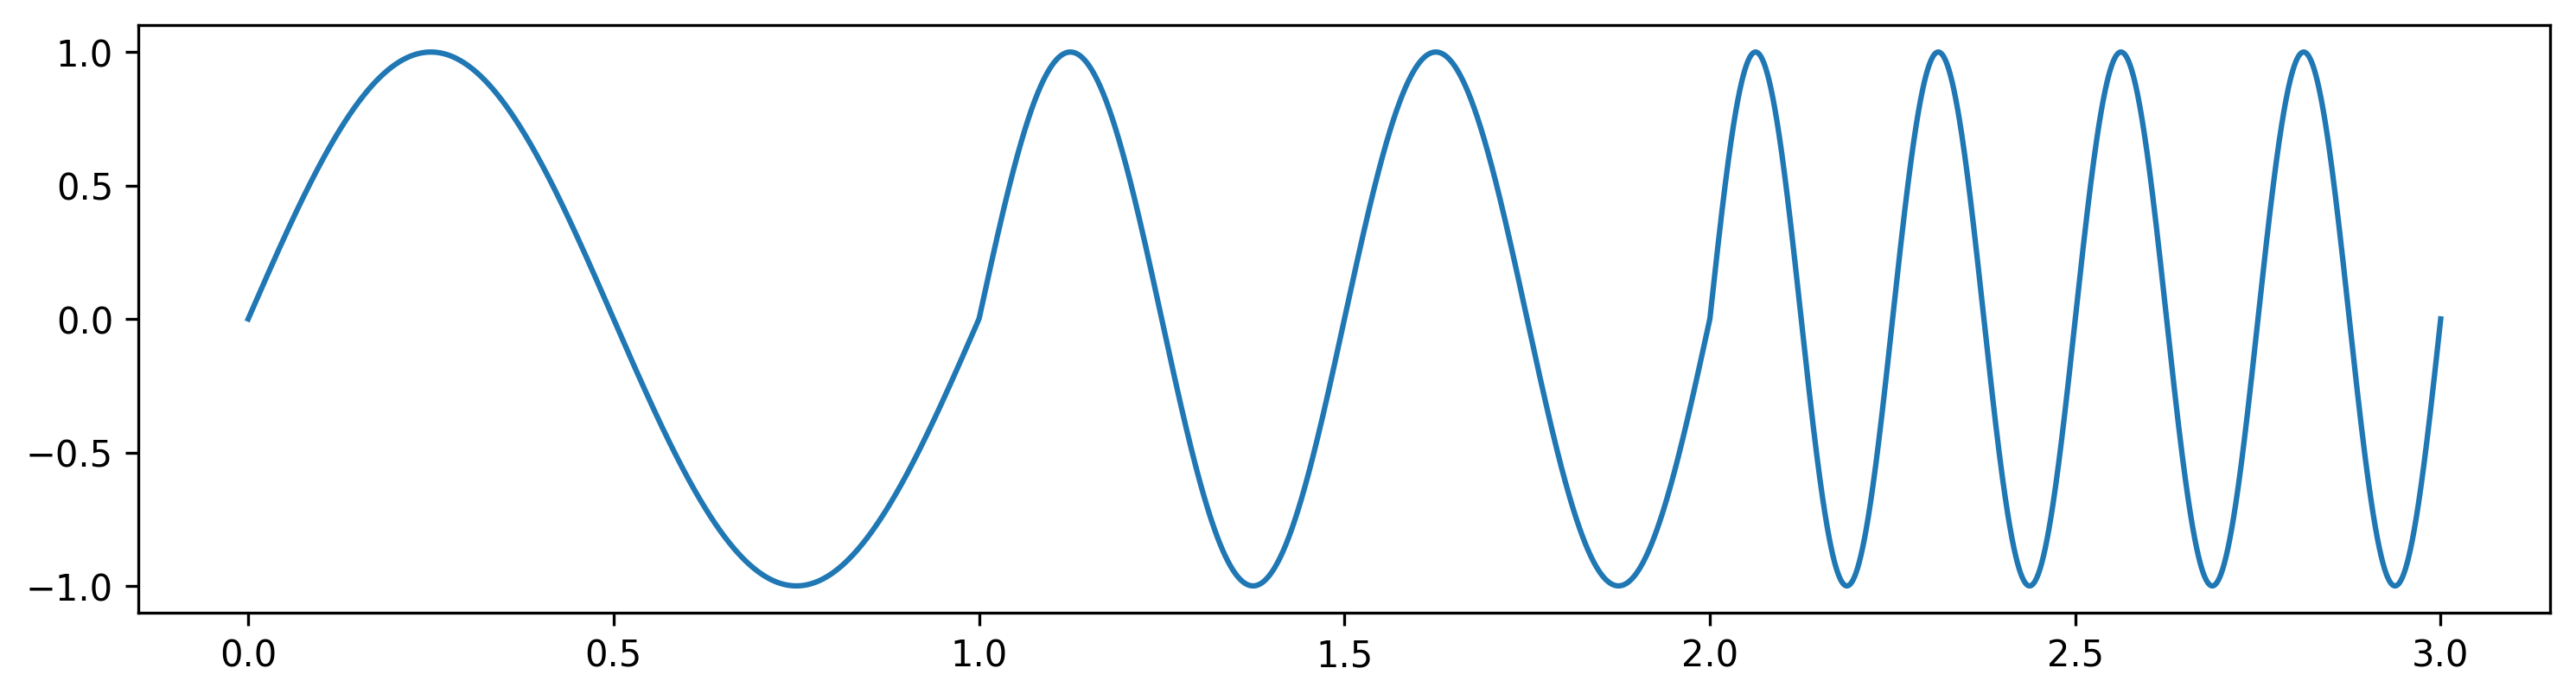

In [15]:
aarp = one >> two >> three
aarp.plot()

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [16]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)
    w = lambda k: [np.exp(2*np.pi * i * 1j * k/n) for i in range(n)]
    Fn = 1/n * np.vstack([w(-k) for k in range(n)])
    return Fn@samples

In [17]:
samples = np.random.random(6)
my_dft = np.real(simple_dft(samples))
sci_dft = np.real(fft(samples)/len(samples))
# print(samples)
print(my_dft)
print(sci_dft)

[ 0.34023356 -0.07292622  0.06958363 -0.07682424  0.06958363 -0.07292622]
[ 0.34023356 -0.07292622  0.06958363 -0.07682424  0.06958363 -0.07292622]


### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [18]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    def split(g):
        n = len(g)
        if n <= threshold:
            return simple_dft(g)*n
        else:
            even = split(g[::2])
            odd = split(g[1::2])
            z = np.array([np.exp(-2 * np.pi * 1j * k/n) for k in range(n)])
            m = n//2
            return np.append(even + z[:m]*odd, even + z[m:]*odd)
    return split(samples)/len(samples)


In [19]:
uncle_sam = np.random.random(4)
my_fft = np.real(simple_fft(uncle_sam))
sci_fft = np.real(fft(uncle_sam)/len(uncle_sam))
print(my_fft)
print(sci_fft)

[ 0.21553503  0.0701682  -0.02050311  0.0701682 ]
[ 0.21553503  0.0701682  -0.02050311  0.0701682 ]


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

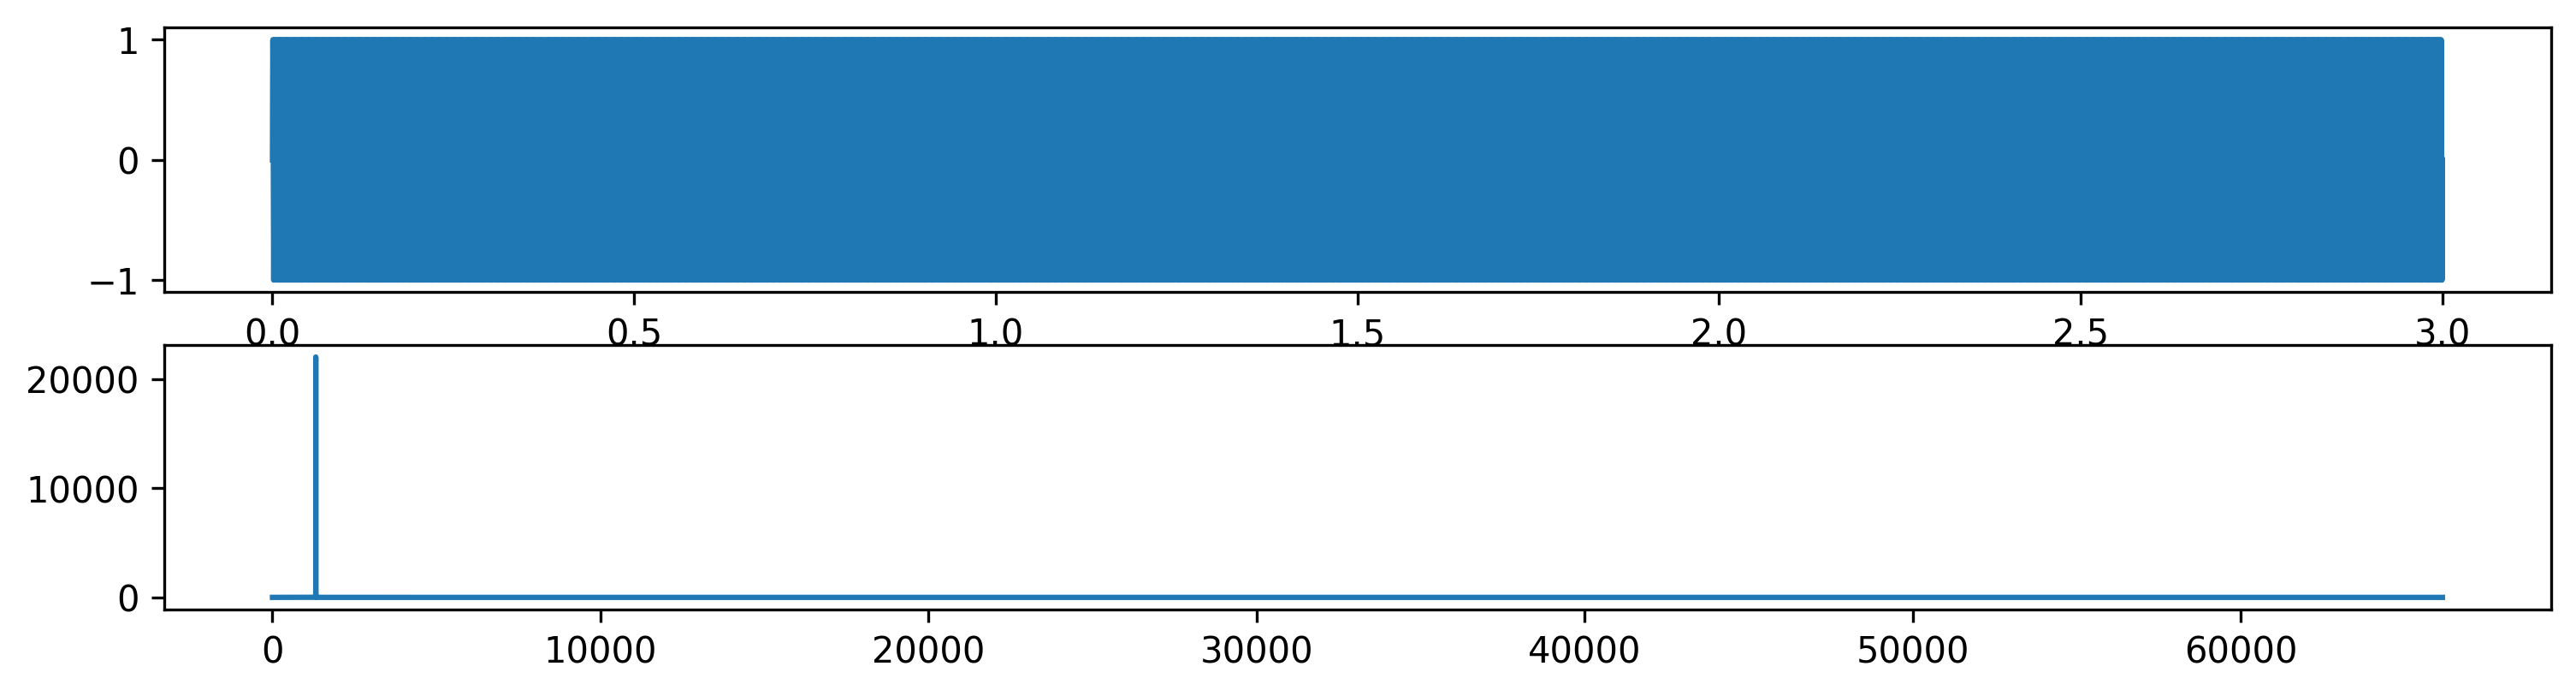

In [20]:
A.plot(True)

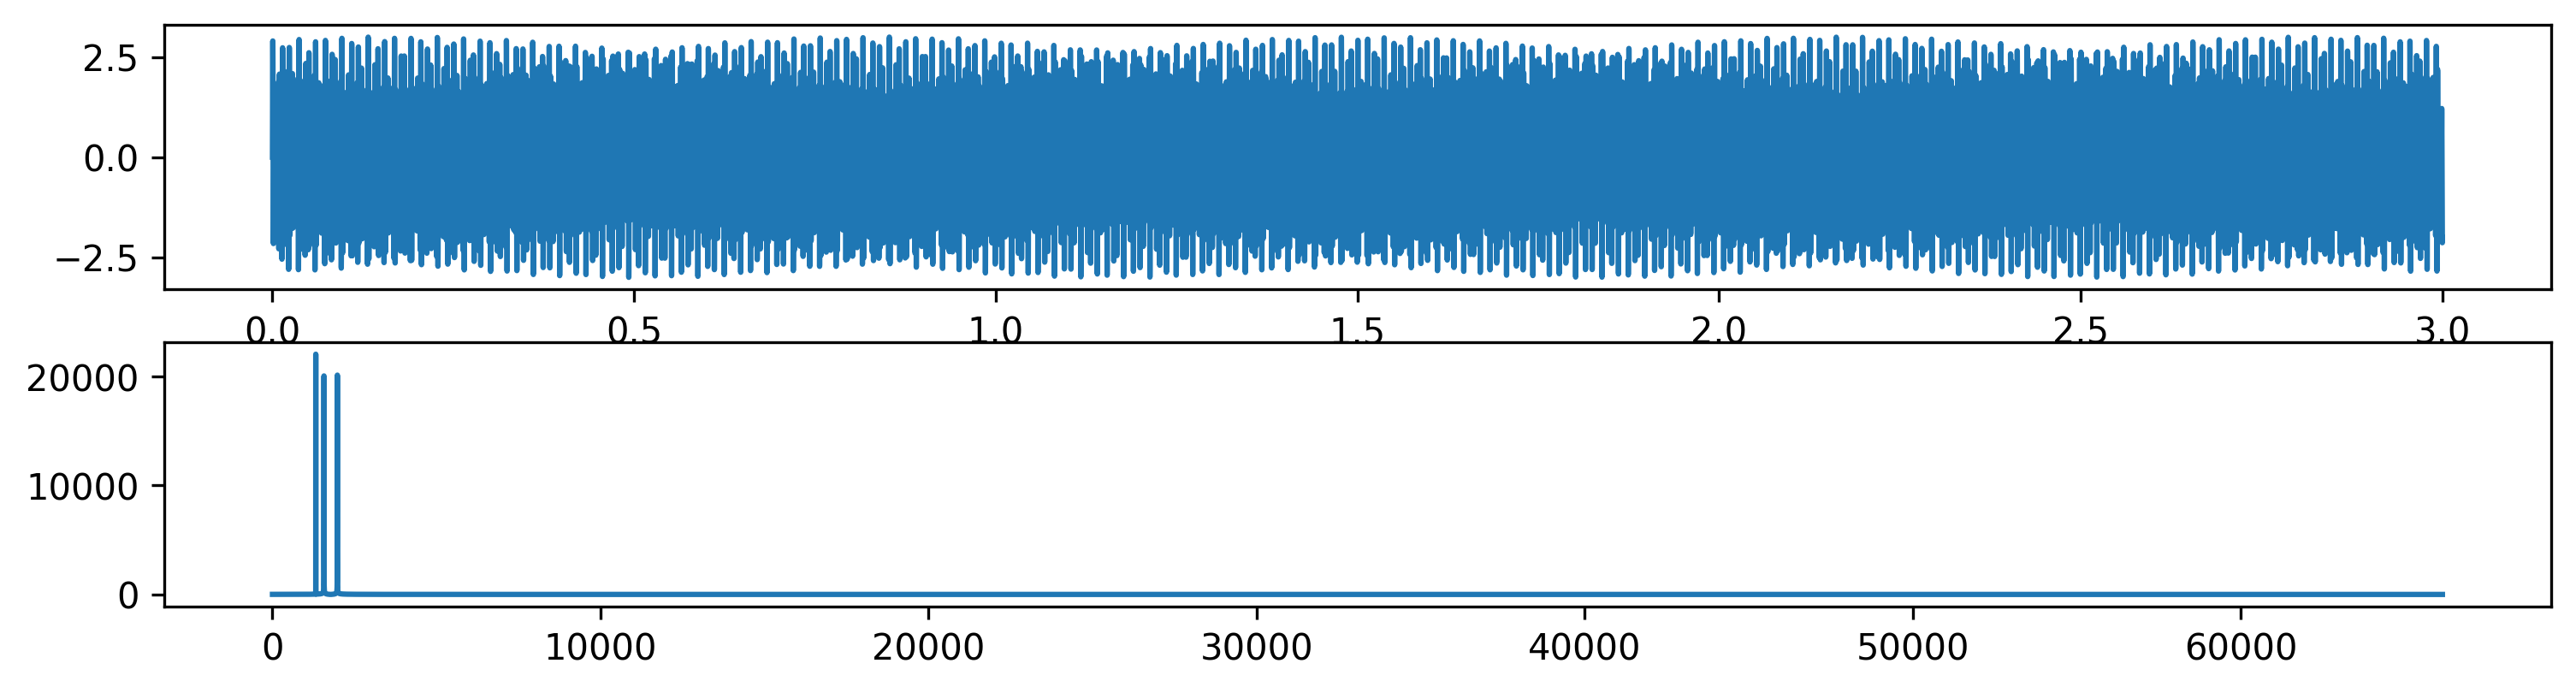

In [21]:
chord.plot(True)

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

freq1: 3136
freq2: 2350
freq3: 2093
freq4: 1760
[1760 3136 2093 2350 2349 2351 2348 2352 2347]


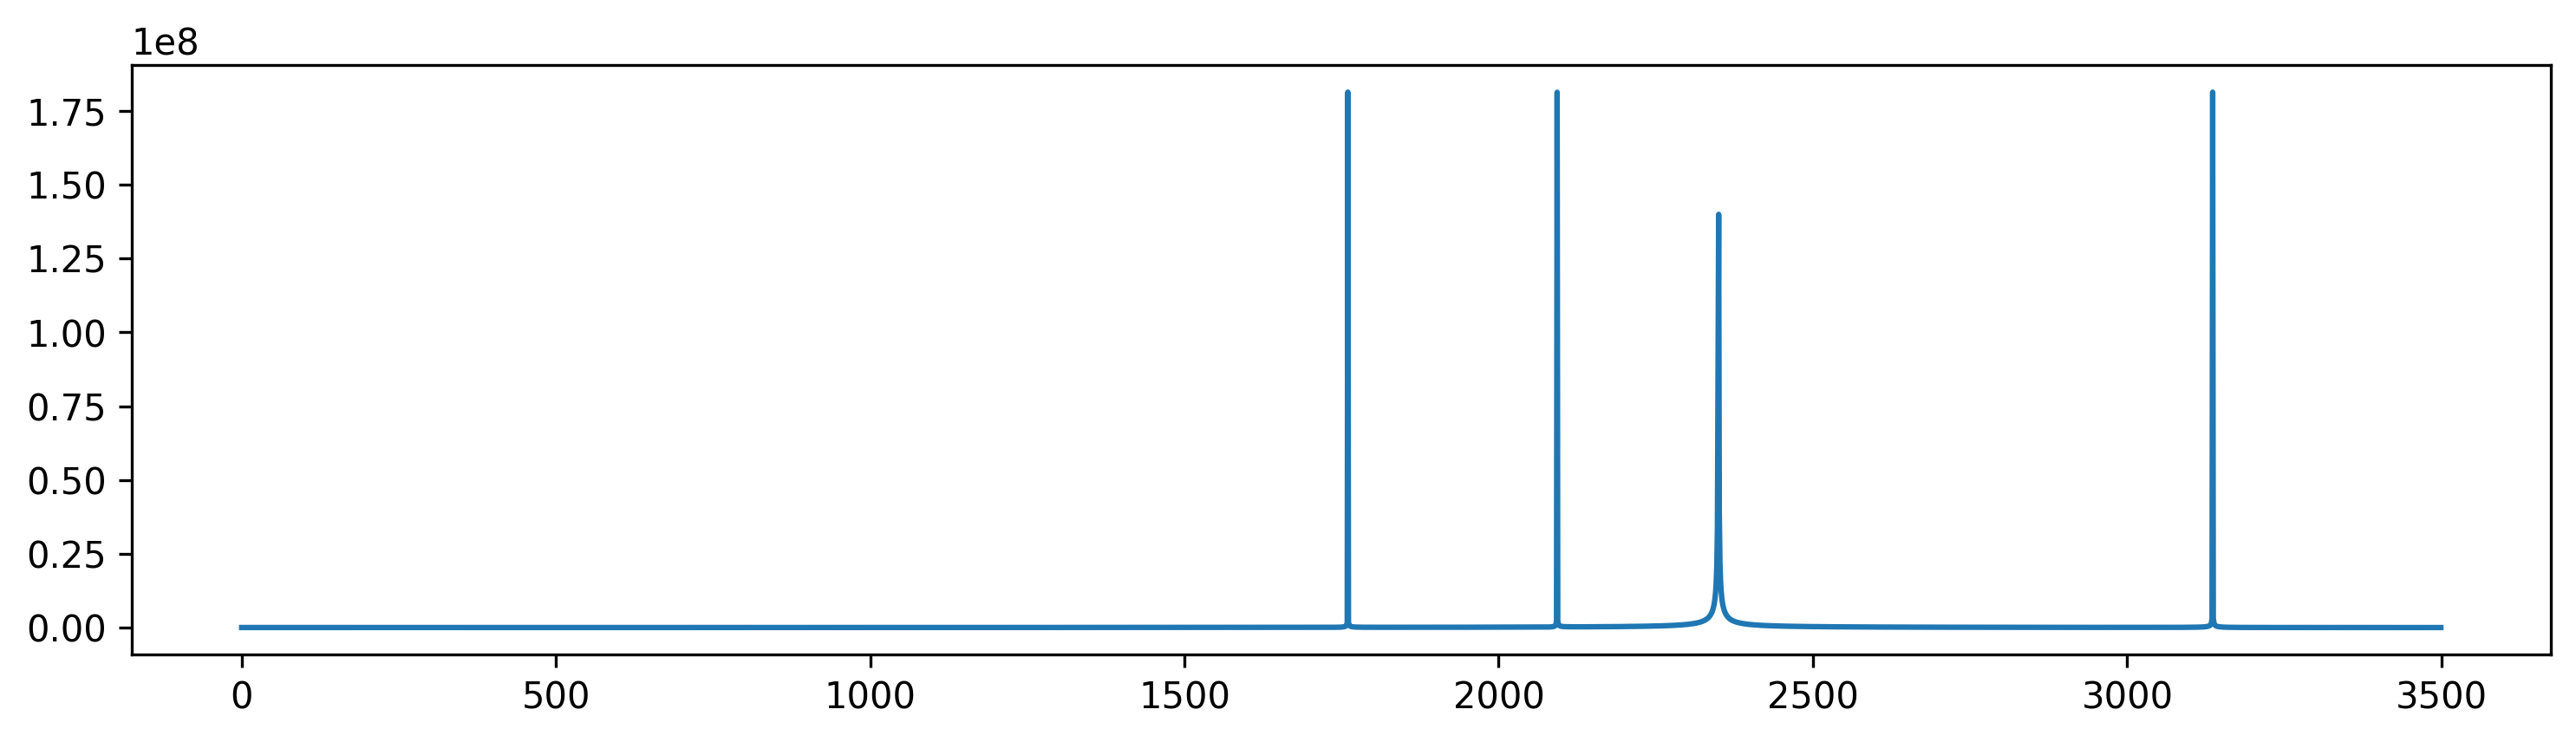

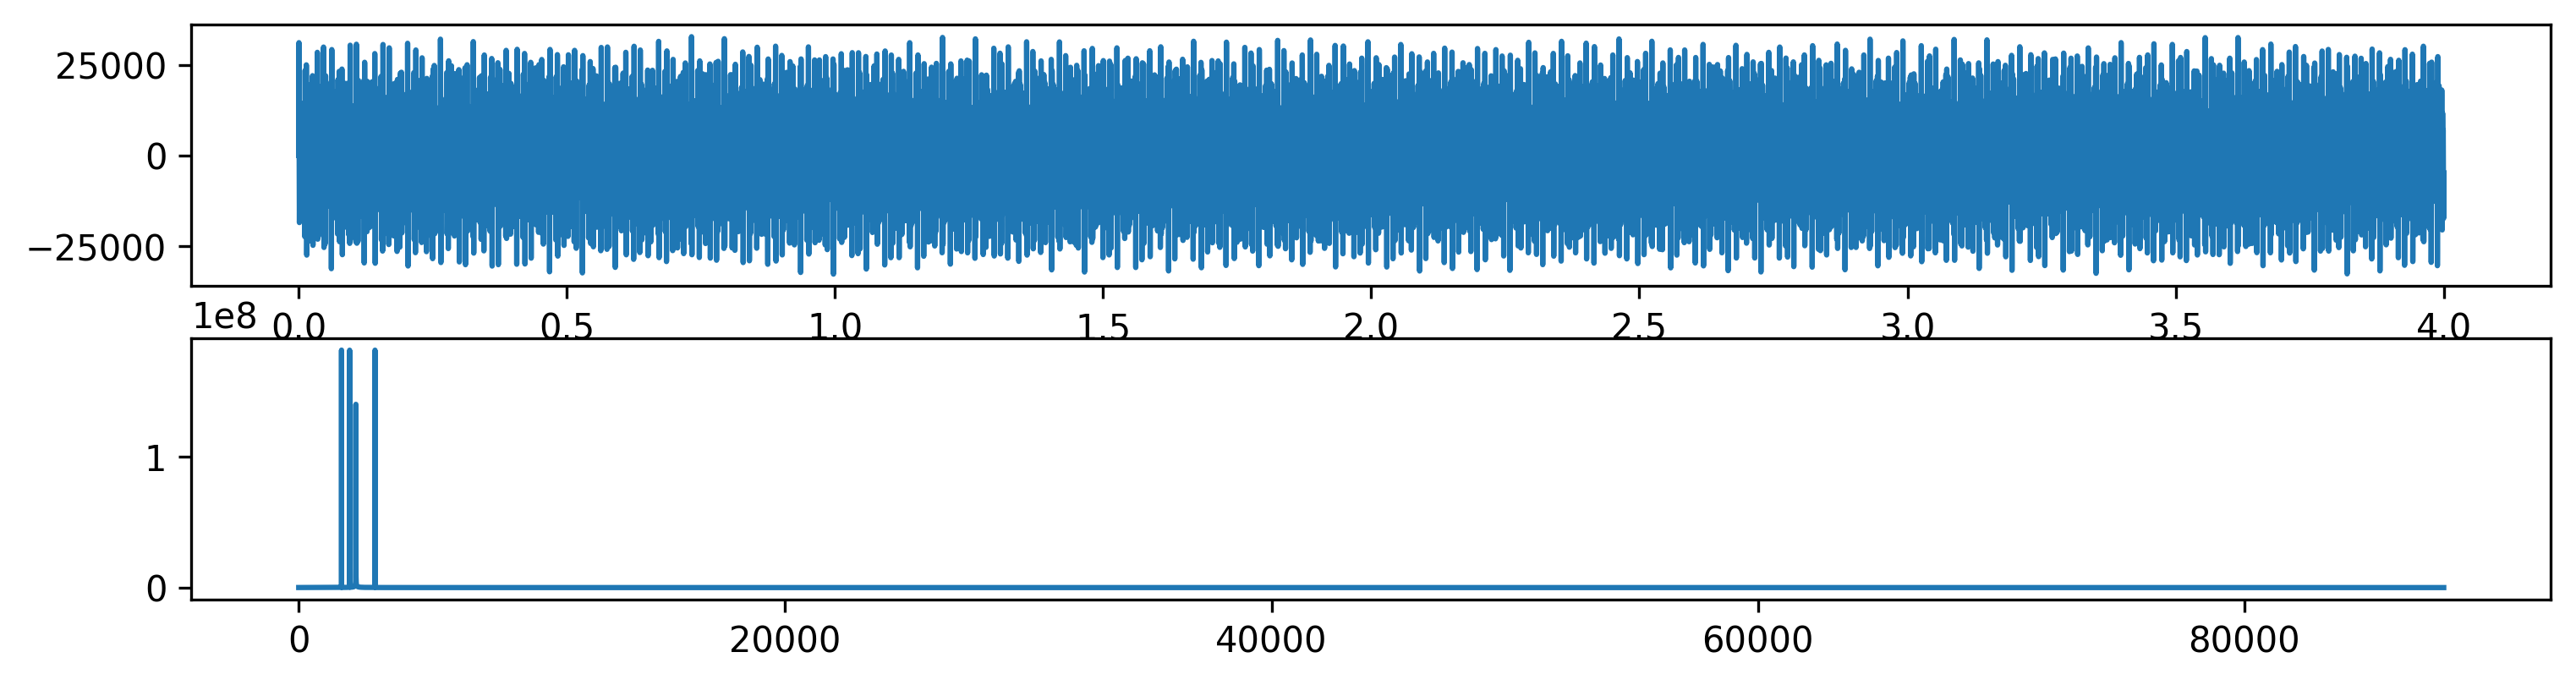

In [46]:
rate, samples = wavfile.read("mystery_chord.wav")
seconds = len(samples)/rate
freqs = fft(samples)/seconds
freqs = np.abs(freqs[:3500])
freq1 = freqs[3000:3500]
freq2 = freqs[2250:3000]
freq3 = freqs[2000:2250]
freq4 = freqs[1500:2000]
print(f'freq1: {np.argsort(freq1)[-1]+3000}')
print(f'freq2: {np.argsort(freq2)[-1]+2250}')
print(f'freq3: {np.argsort(freq3)[-1]+2000}')
print(f'freq4: {np.argsort(freq4)[-1]+1500}')
top_freqs = np.argsort(freqs)
print(top_freqs[:-10:-1])
plt.plot(freqs)
plt.show()
soundbyte = SoundWave(rate, samples)
soundbyte.plot(True)

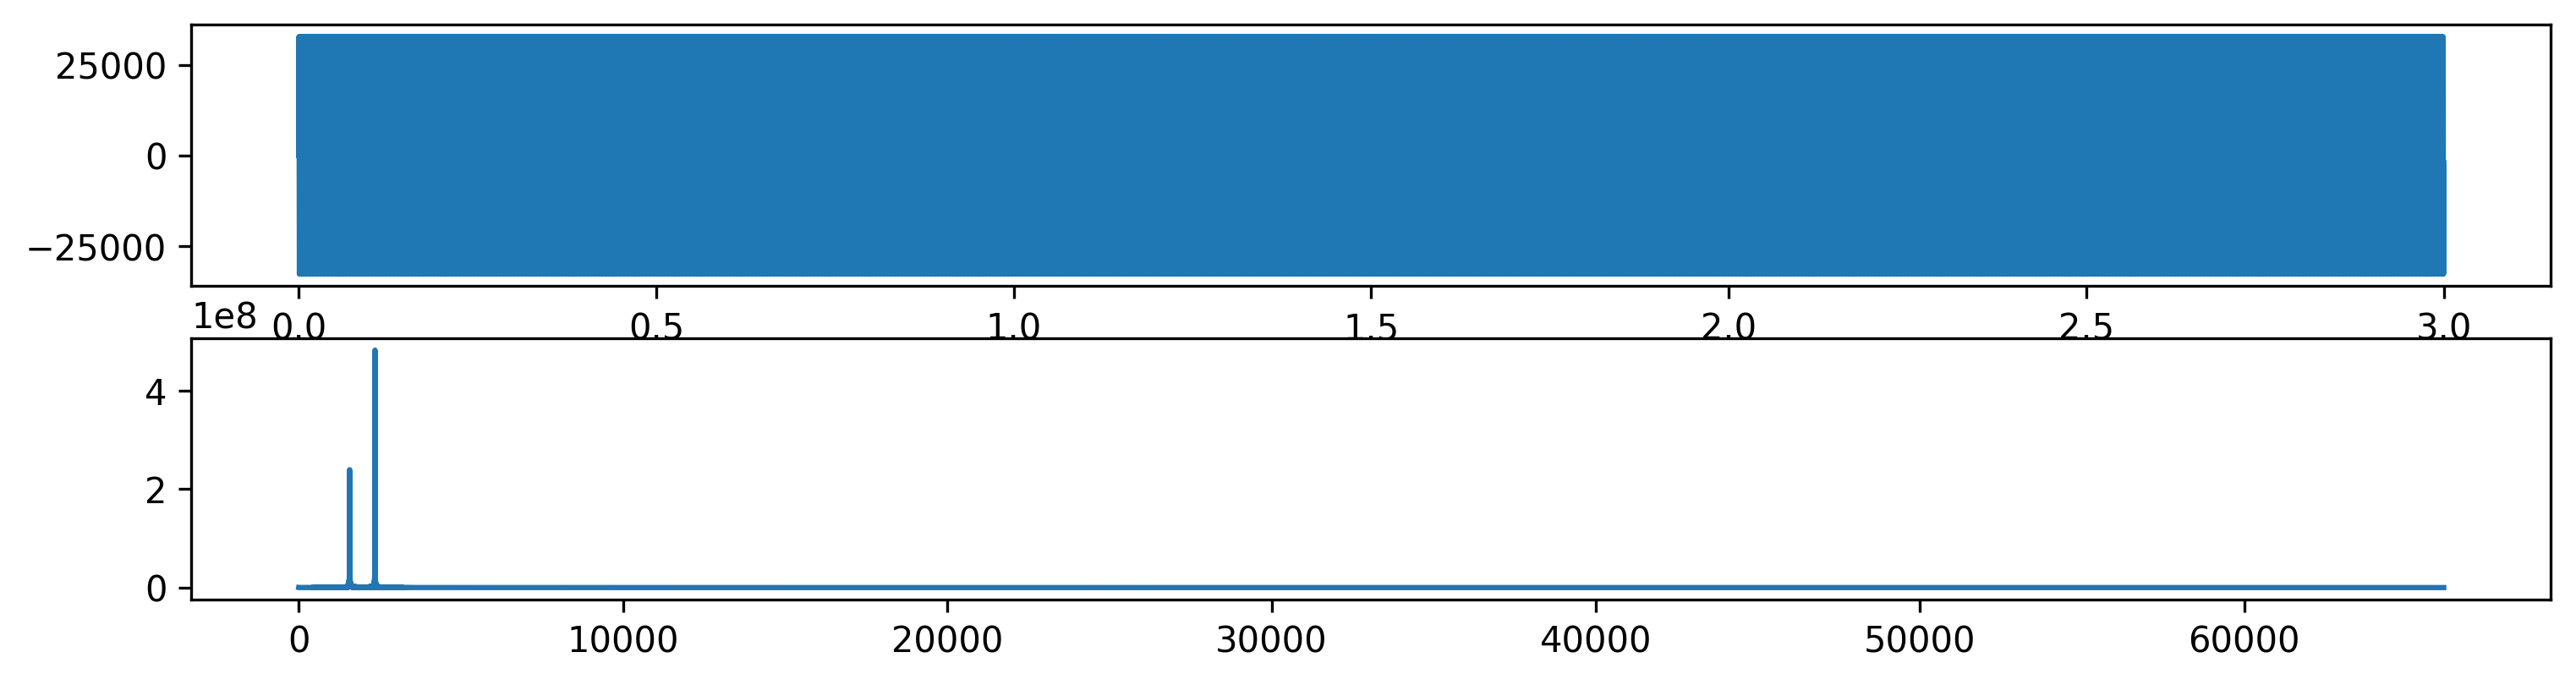

In [23]:
rate, samples = wavfile.read("GCG.wav")
soundbyte = SoundWave(rate, samples)
soundbyte.plot(True)

(7397376, 2)


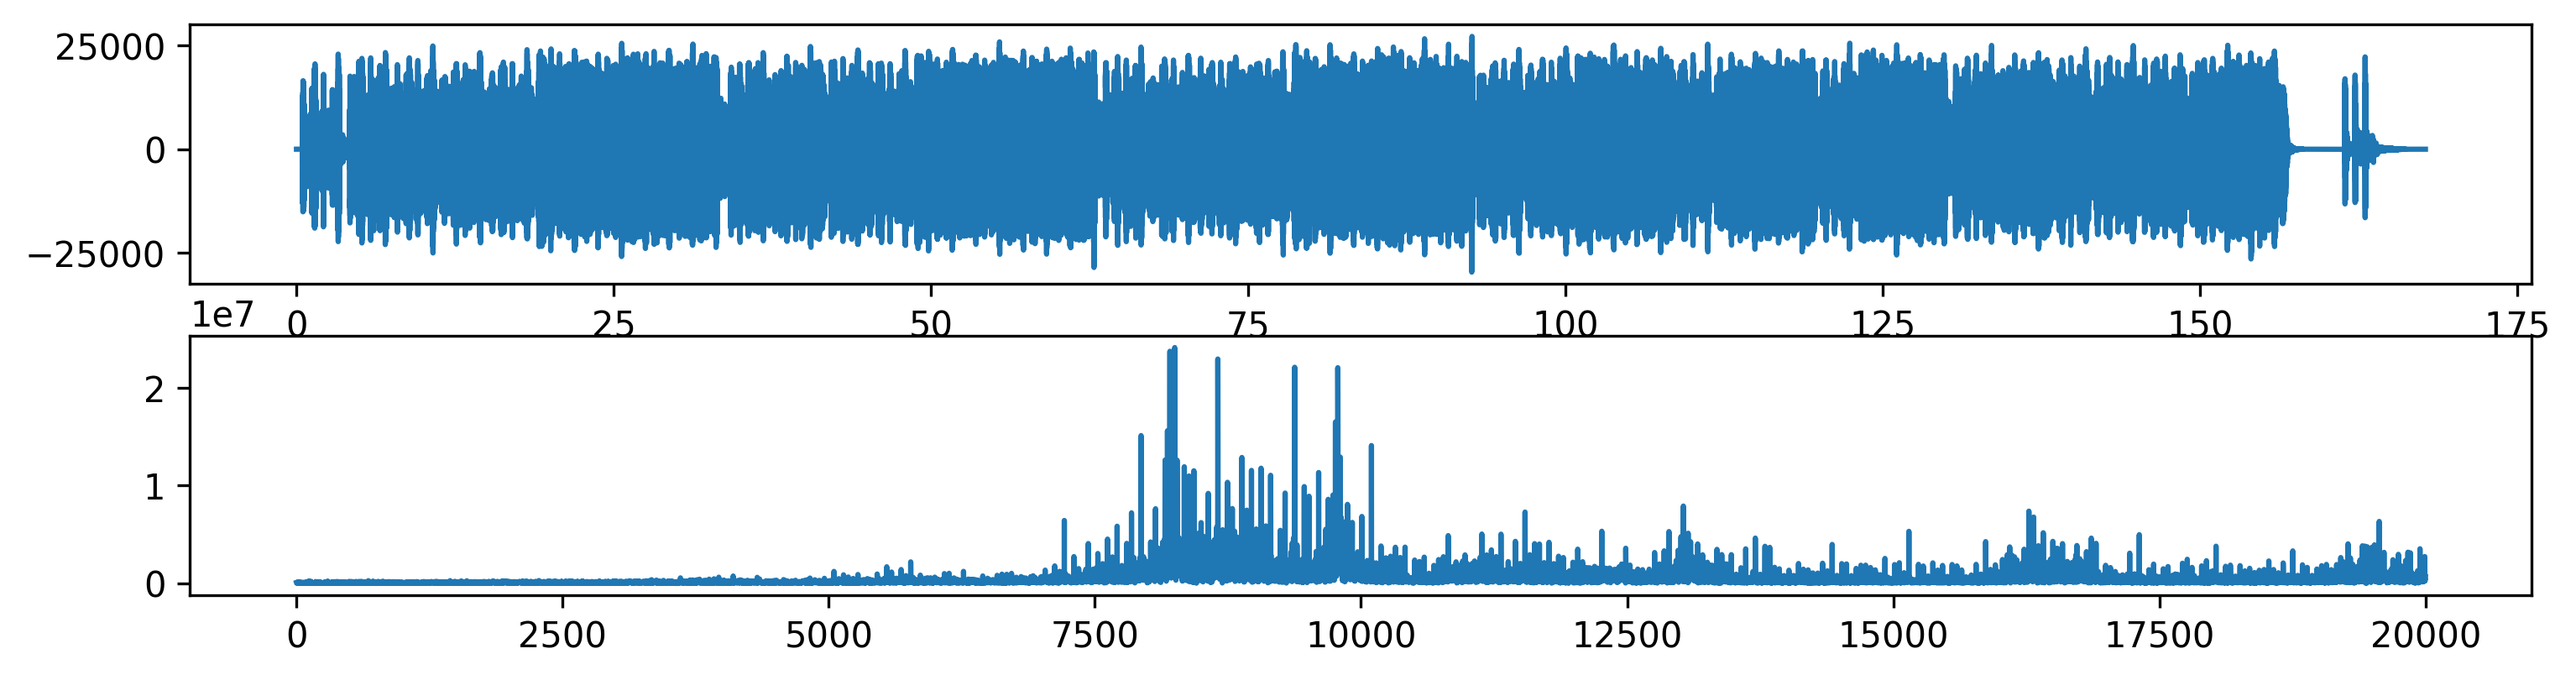

In [27]:
rate, samples = wavfile.read("threw.wav")
soundbyte = SoundWave(rate, samples[:,0])
soundbyte.plot(True, True)

/var/folders/j0/dm4fbfs97z932w8fw8c3cvqc0000gn/T/ipykernel_41802/1835679613.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, samples = wavfile.read("FurElise.wav")


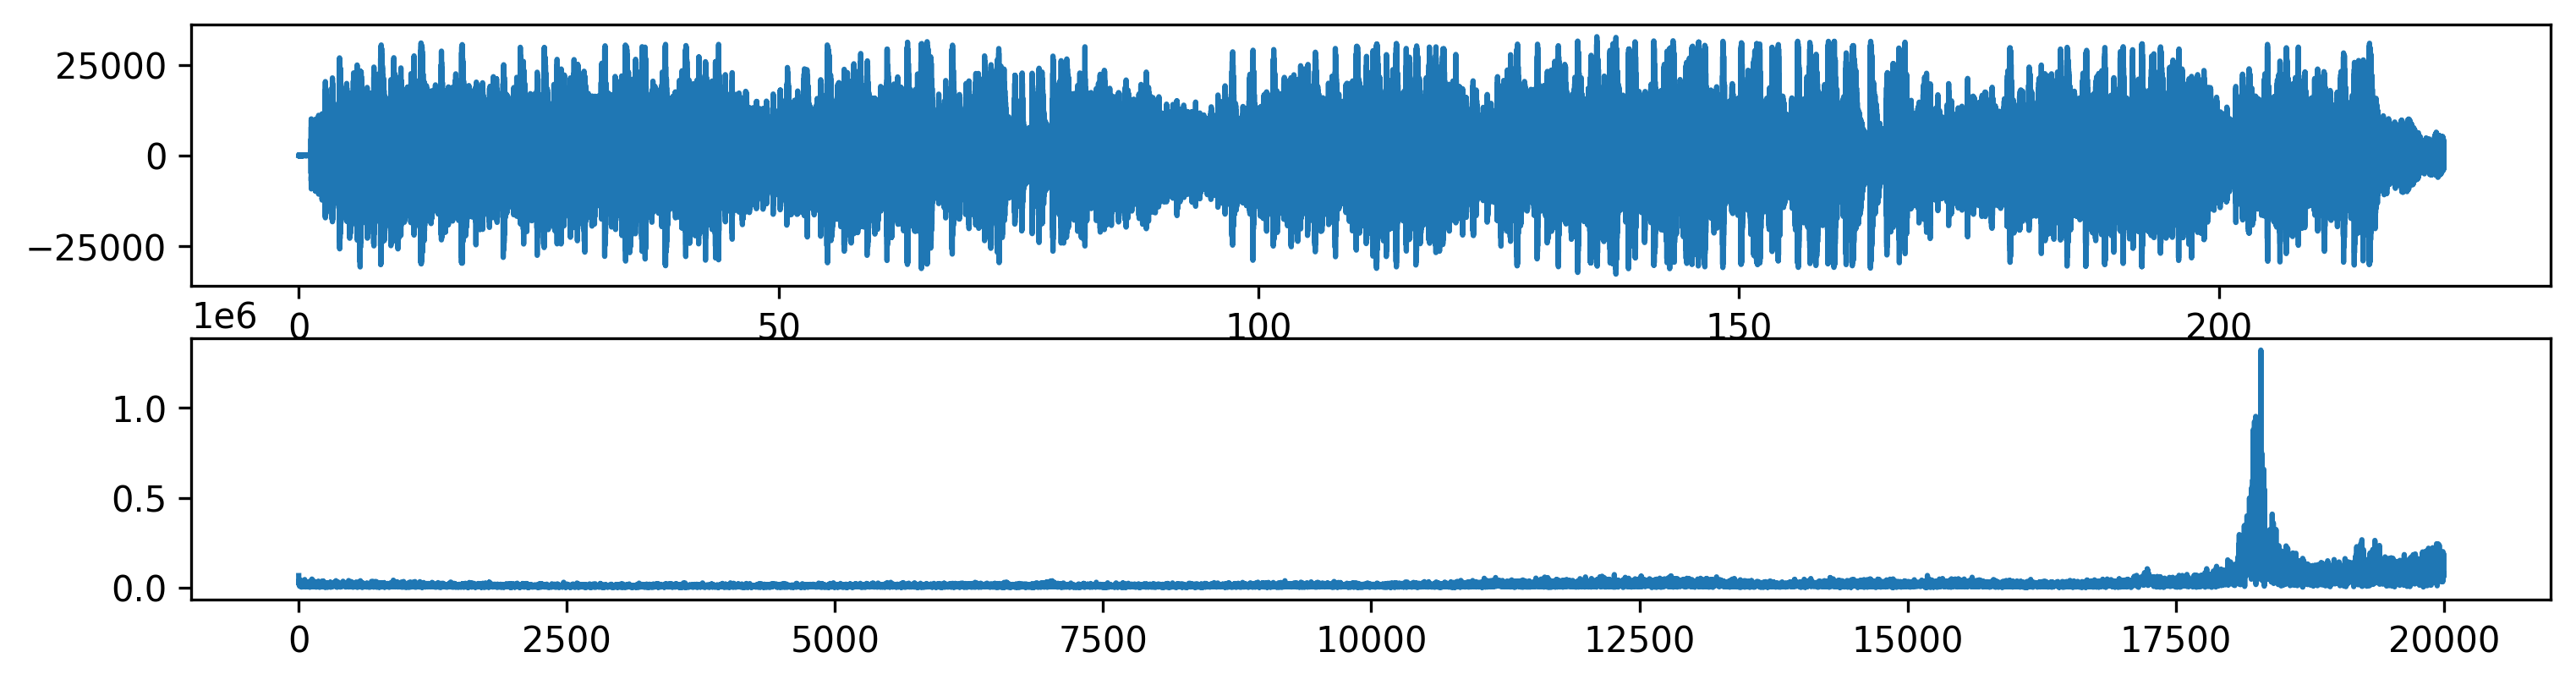

In [51]:
rate, samples = wavfile.read("FurElise.wav")
soundbyte = SoundWave(rate, samples[:,0])
soundbyte.plot(True, True)

The notes are...
freq1: 3136 => G
freq2: 2350 => D
freq3: 2093 => C
freq4: 1760 => A

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...